In [1]:
import numpy as np
import pandas as pd

In [2]:
data= pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


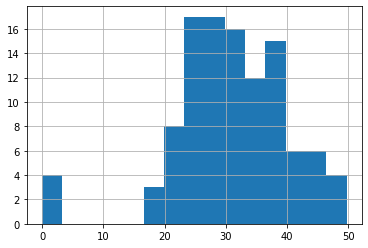

In [4]:
import matplotlib.pyplot as plt
data["BMI"].hist(bins=15)
plt.show()

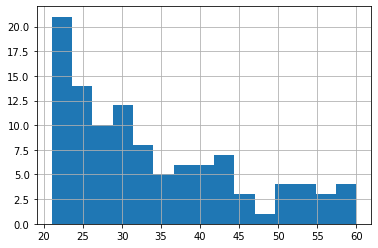

In [5]:
import matplotlib.pyplot as plt
data["Age"].hist(bins=15)
plt.show()

In [6]:
correalation_matrix = data.corr()
correalation_matrix["Pregnancies"]

Pregnancies                 1.000000
Glucose                     0.231129
BloodPressure               0.168389
SkinThickness              -0.106864
Insulin                    -0.093391
BMI                         0.062337
DiabetesPedigreeFunction   -0.178041
Age                         0.543135
Outcome                     0.223353
Name: Pregnancies, dtype: float64

In [7]:
correalation_matrix["Outcome"]

Pregnancies                 0.223353
Glucose                     0.438949
BloodPressure               0.102074
SkinThickness               0.115311
Insulin                     0.219984
BMI                         0.314628
DiabetesPedigreeFunction    0.179346
Age                         0.390658
Outcome                     1.000000
Name: Outcome, dtype: float64

In [8]:
x=data.drop("Outcome",axis=1)
x=x.values
y=data["Outcome"]
y=y.values

In [11]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
new_point= np.array([5,160,79,23,98,32,0.548,34])

In [15]:
distance=np.linalg.norm(x-new_point,axis=1)
k=7
nearest_neighbor_ids = distance.argsort()[:k]
nearest_neighbor_ids

array([69, 28, 88, 40, 25, 94, 63], dtype=int64)

In [16]:
nearest_neighbor_ring = y[nearest_neighbor_ids]
nearest_neighbor_ring

array([0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [17]:
prediction =nearest_neighbor_ring.mean()
prediction

0.2857142857142857

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=11)

In [19]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(x_train)
mse=mean_squared_error(y_train,train_preds)
rmse=sqrt(mse)
rmse

0.4417871207728023

In [21]:
test_preds=knn_model.predict(x_test)
mse=mean_squared_error(y_train,train_preds)
rmse=sqrt(mse)
rmse

0.4417871207728023